# mean, median (grade 제외)

df0:엑셀 파일 읽어오기
df :불러온 엑셀파일을 pandas를 통해 dataframe으로 만들기
columns :엑셀 파일의 각 컬럼의 값 들을 for 구문으로 불러오기 위해 하나의 리스트로 정리하였습니다.
label : 각 컬럼의 이름을 불러오기 위해서 선언하였습니다. 

for 문을 통해서 i가 0부터 6까지 1씩 증가하면서 
sno, attendance, homework .. 순서로 각 컬럼의 값들을 불러오고
numpy의 mean을 사용하여 평균을 하였습니다.
이 때 구한 평균을 소수점 2자리 까지만 나오도록 설정하였습니다.

마찬가지로 같은 논리를 통하여 numpy의 median을 사용하여 중간값을 구하였습니다.



In [1]:
import numpy as np
import pandas as pd

f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'
df0 = pd.read_excel(f) 
df = pd.DataFrame(df0)

columns = [df.sno ,df.attendance, df.homework, df.discussion, df.midterm, df.final, df.score]
label = df.columns

print('mean(평균)')
for i in range(0,7):
    a = np.mean(columns[i])
    print(label[i],':','%.2f' %a)
    
print('\n','\n','median(중간 값)')
for i in range(0,7):
    a = np.median(columns[i])
    print(label[i],':','%.2f' %a)

mean(평균)
sno : 46.50
attendance : 7.80
homework : 18.29
discussion : 0.24
midterm : 23.56
final : 14.15
score : 64.04

 
 median(중간 값)
sno : 46.50
attendance : 8.00
homework : 19.37
discussion : 0.00
midterm : 24.50
final : 13.65
score : 67.59


# mode (grade만)

mode : grade의 값들을 모두 불러와 하나의 리스트로 만들기 위해서.

count_A, count_B ,count_C, count_D, count_F  : 각 계급의 개수를 세기 위해

for 문을 통해서 mode에 추가하여 계급 값 전체를 하나의 리스트로 만들었습니다. 

그리고 if 조건문으로 
각 계급(A ,B C, D, F)을 하나씩 개수를 세었고, 
각 계급의 개수를 전체의 개수(len(mode))로 나누어
각 계급의 비율을 구하였습니다. 

마지막으로 각 계급에 따라 개수(명), 비율을 출력했습니다.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'
df0 = pd.read_excel(f) 
df = pd.DataFrame(df0)
def alpha(f): 
    mode = []
    count_A, count_B ,count_C, count_D, count_F = 0,0,0,0,0


    for i in df.grade:                        # grade의 값들을 하나 씩 
        mode.append(i)                        # mode리스트에 추가


    for j in mode:
        if j == 'A' :
            count_A += 1

        elif j == 'B' :
            count_B +=1

        elif j == 'C' :
            count_C +=1


        elif j == 'D' :
            count_D +=1


        elif j== 'F' :
            count_F +=1

    mode_length = len(mode)                # 전체 계급의 개수 

    A = float('%2.3f' %(count_A / mode_length))*100  # A의 비율

    B = float('%2.3f' %(count_B / mode_length))*100  # B 의 비율

    C = float('%2.3f' %(count_C / mode_length))*100  # C의 비율

    D = float('%2.3f' %(count_D / mode_length))*100  # D의 비율

    F = float('%2.3f' %(count_F / mode_length))*100  # F의 비율


    print( 'Grade A : ' , count_A,'명' , A ,'%' )

    print( 'Grade B : ' , count_B,'명' , B,'%'  )

    print( 'Grade C : ' , count_C,'명' , C,'%'  )

    print( 'Grade D : ' , count_D,'명' , D, '%'  )

    print( 'Grade F : ' , count_F,'명' , F,'%'  )
    return print('The End')

alpha(f)

Grade A :  20 명 21.7 %
Grade B :  20 명 21.7 %
Grade C :  20 명 21.7 %
Grade D :  20 명 21.7 %
Grade F :  12 명 13.0 %
The End


# variance, standard deviation, AAD, MAD (grade 제외)

####
분산과 표준편차는 numpy의 method를 이용했습니다.

for 문을 통해 sno, attendance,homework, discussion, midterm, final, score 을 하나 씩 불러오고
np.var , np.std를 통해 분산과 표준편차를 구하였습니다.

####
AAD(Average of absolute deviation)은 
average of absolute deviation이 pandas에 Mean Absolute Deviation이 있어서 사용했습니다.

####
MAD(Median of absolute deviation)은
강의 자료에서 본 median( {｜x1-x_bar｜} , {｜x2-x_bar｜} ,...}를 이용하여 식을 만들었습니다.

평균을 mean으로 선언하고 위에서 구한 방법으로  mean = np.mean을 통해 x_bar를 구하여
각 column의 값들(x1, x2, ... xn => for 문에서 j ) 을 빼고, 

만약 이 값이 음수라면, -1 을 곱하여 양수로 만들어 준 후 
result_1값에 선언 후 result 리스트에 추가하였습니다.

다 계산 한 후에는 result를 정렬하고
result내의 개수가 짝수인지 홀수인지에 따라 중간 값 선정하는 기준을 나누었습니다.

각 행의 설명은 밑에 더 추가 해놓았습니다.


In [3]:
import pandas as pd  
import numpy as np 

f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'
df0 = pd.read_excel(f) 
df = pd.DataFrame(df0)

columns = [df.sno ,df.attendance, df.homework, df.discussion, df.midterm, df.final, df.score]
label = df.columns


for i in range(0,7):
    print(label[i])
    Var  = np.var(columns[i])                      #분산 
    Std = np.std(columns[i])                       #표준편차
    print('분산:','%.2f' %Var)
    print('표준편차:','%.2f' %Std,'\n')
    
#     print('표준편차^2:','%.2f' %b**2, '\n')


# AAD : average of absolute deviation
AAD = df.mad() 
print('AAD' , '\n', AAD)


#MAD : Median of absolute deviation
print('\n', 'MAD')
for i in range(0,7):                       #각 column돌아가면서 실행
    mean = np.mean(columns[i])             #해당 column의 평균 값
    lenth = len(columns[i])                #해당 column의 길이(개수)
    result = []                            #해당 column의 계산 값 넣을 리스트 선언
    
    for j in columns[i]:                  #하나의 column내의 값 들 
        result_1 = j - mean               # 값 - 평균 
        if result_1 <= 0 :                # 음수라면, -1 곱해서 양수 만들기
            result_1 = result_1 * (-1)  
            result.append(result_1)       # 양수의 계산 값 result에 추가
        else:
            result.append(result_1)       #계산 값 result에 추가
    
    result.sort()                         #result 값 오름차순 정렬

    
    if lenth%2 == 0 :                   # result의 개수 짝수이면, 
        n = lenth//2                     
        # print(result[n-1]+result[n]) 
        MAD = ((result[n-1]+result[n]) / 2)  # 가운데 2개를 더하고 나누어서 중간값을 구했습니다.
    else :                              # result의 개수 홀수이면,
        n = lenth//2                    # 가운데 중간 값을 구했습니다. 
        MAD = result[n]
        
    print(label[i], ' : %3.2f'% MAD)   

sno
분산: 705.25
표준편차: 26.56 

attendance
분산: 0.12
표준편차: 0.35 

homework
분산: 7.62
표준편차: 2.76 

discussion
분산: 0.42
표준편차: 0.65 

midterm
분산: 62.31
표준편차: 7.89 

final
분산: 59.91
표준편차: 7.74 

score
분산: 228.78
표준편차: 15.13 

AAD 
 sno           23.000000
attendance     0.221418
homework       1.618819
discussion     0.421078
midterm        6.160808
final          6.272212
score         11.691163
dtype: float64

 MAD
sno  : 23.00
attendance  : 0.20
homework  : 1.08
discussion  : 0.24
midterm  : 5.31
final  : 5.10
score  : 10.19


# percentile plot (grade 제외)


### percentile plot 은  numpy.percentile을 통해 
### 0부터 100%까지 10% 간격으로 ( = per)
### 값들을 도출해 낸 후  ( = num)
### 그 값들을 꺾은선 그래프를 통해 나타내었습니다. 

for j in range(0,7)은 각 컬럼에 따른 값들을 불러옵니다.
그 아래 for i in rnage(0,110,10) 으로 1부터 100까지 10 간격을 두고 per 리스트에 추가합니다.

그렇게 x축으로 설정할 per을 만들었고,

각 percent에 위치한 값들을 ( 0% ,10%, ... , 90% , 100%) a로 저장하도록 numpy의 percentile 메소드를 사용하였습니다.

그리고 이 a 값들은 소수 첫째 자리까지만 나타내도록 설정하고 num 리스트에 추가했습니다.
이 num 리스트는 y축의 값으로 사용하였습니다.

마지막으로 y축의 간격을 일정하게 설정하기 위하여 
y축의 범위를 0부터 num의 최댓값 ( = 100%에 위치한 값 = num[10])을 10으로 나누어 간격을 구했습니다. (= p) 
그리고 이 간격에 최댓값을 num[10]에 p를 한번 더 더하여 마지막 눈금이 최댓값(=num[10])이 되도록 설정했습니다.




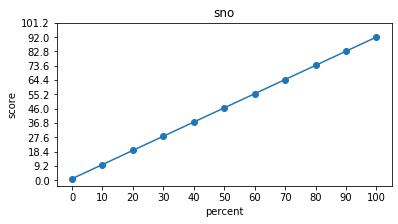

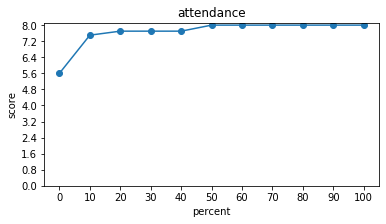

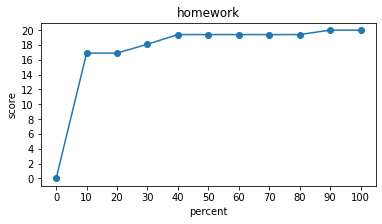

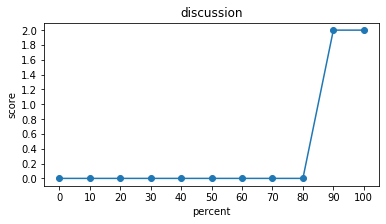

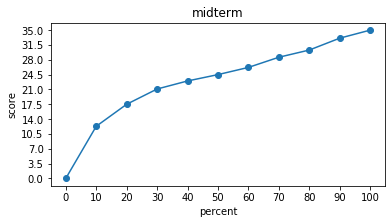

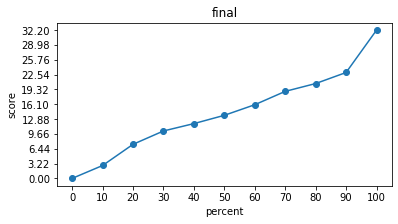

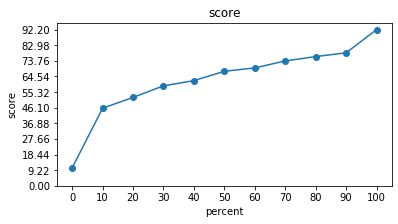

In [4]:
from matplotlib import mlab as ml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'
df0 = pd.read_excel(f)
df = pd.DataFrame(df0)

columns = [df.sno ,df.attendance, df.homework, df.discussion, df.midterm, df.final, df.score]
label = df.columns

for j in range(0,7):
    num, per = [], []
    plot = columns[j]

    for i in range(0,110, 10) : 
        per.append(i)
        np.sort(plot)
        a = np.percentile(plot , i)
        a = '%.1f' %a
        num.append(float(a))

    p = num[10]/10                                  # y축 점수간 간격입니다.  (간격을 최고점인 percent[10]을 10으로 나누어 간격을 정하였습니다.)  

    plt.figure(figsize=(6,3))                           #도표 사이즈 지정
    plt.plot(per, num, marker='o')                  #x축 : 0부터 100까지 10씩 건너띄는 숫자 / y축 : 각 컬럼의 퍼센트에 따른 점수 / 각 점수마다 마커표시 
    plt.xticks(per, labels=per)                         #x축 0부터 100까지 10 단위로 눈금 표시 
    plt.yticks(np.arange(0, num[10]+p, p))          # y축 0부터 최댓값 까지 일정한 간격 두고 10개로 눈금표시
    plt.xlabel('percent')                               # x축 라벨 : 퍼센트
    plt.ylabel('score')                                 # y축 라벨 : 각 항목에 대한 점수 
    
    plt.title(label[j])                                 #표 제목 : 엑셀 파일의 컬럼 제목

    plt.show()                                          #출력 




# boxplot (grade 제외)


boxplot은 
엑셀 파일을 읽어오고 
dataframe을 설정한 후 
그 dataframe의 boxplot 메소드를 사용하여 
각 컬럼의 이름을 선언하여 
출력하였습니다!


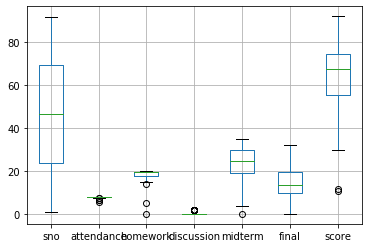

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'
df0 = pd.read_excel(f) 
df = pd.DataFrame(df0)

df.boxplot(column= ['sno','attendance', 'homework', 'discussion', 'midterm', 'final', 'score'])
plt.show()


# (6) histogram (모든 애트리뷰트)

히스토그램은 모든 어트리뷰트를 사용하였습니다.

각 컬럼별로 df.hist( 컬럼이름) 을 통하여 각 각 히스토그램을 생성할 수 있었습니다.
이 때, hist의 설정에 따라 여러가지 조작이 가능함을 알고 
여러 설정을 변경해보며 히스토그램을 생성했습니다.

이 때 이 df.hist의 히스토그램은 numeric 한 값들만 인식가능하였기 때문에, 

grade의 히스토그램은 다른 형태로 만들었습니다.
grade 컬럼의 값들을 mode 라는 리스트를 선언하여 
for문을 통해 이 mode 리스트에 모아서 한번에 모았습니다.

그리고 이 mode를 통해 matplotlib.pyplot을 이용하여 히스토그램을 생성할 수 있었습니다. 

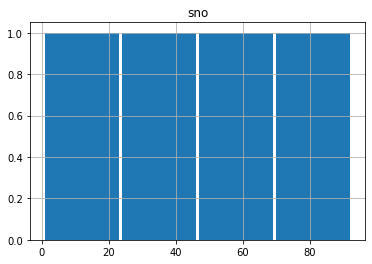

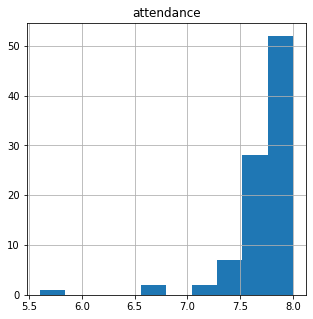

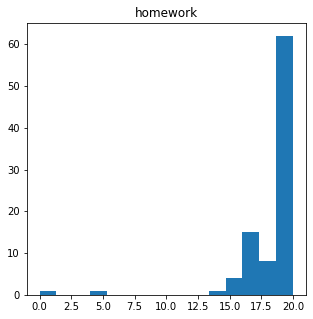

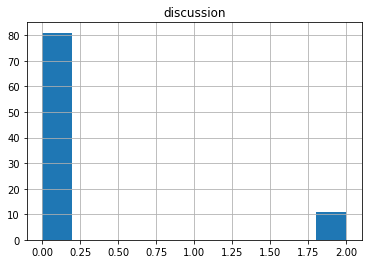

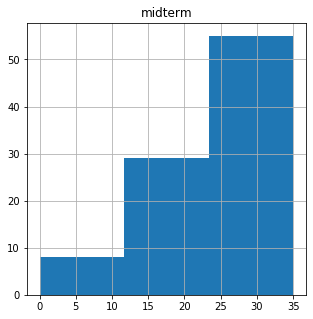

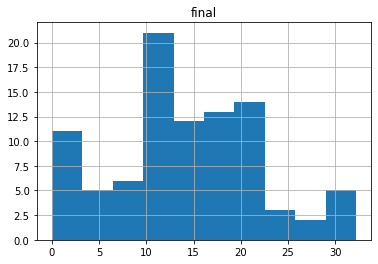

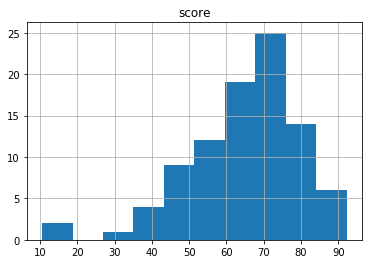

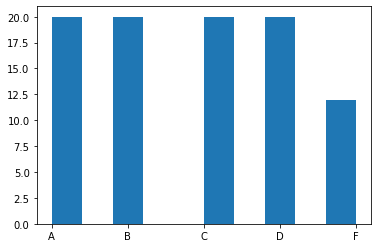

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'

df0 = pd.read_excel(f) 
df = pd.DataFrame(df0)


# print(df)
columns = [df.sno ,df.attendance, df.homework, df.discussion, df.midterm, df.final, df.score, df.grade]

df.hist( column = ['sno'] ,bins = 95)                                        #bins : 칸 개수 
df.hist( column = ['attendance' ] , figsize=(5, 5) )                         #figsize : 도표 크기 
df.hist( column = ['homework'] , figsize=(5, 5) , bins = 15 , grid = False) #grid : 격자, #bins : 나눌 구간의 개수 
df.hist( column = ['discussion']  )                                          
df.hist( column = [ 'midterm'] ,bins= 3 , figsize = (5,5))                  
df.hist( column = ['final']  )
df.hist( column = ['score']  )
plt.show()

#grade histogram
mode = []
for i in df.grade     :                         # grade 컬럼의 값들을 하나 씩 
    mode.append(i)                              # mode 리스트에 추가 
plt.hist(mode)                                  # mode를 히스토그램 화 
plt.show()














# scatter plot (grade는 제외, 모든 가능한 attribute 조합에 대하여 그릴 것)

조합이 총 15개이기 때문에 하나씩 하면 줄이 너무 길어져서 함수를 만들어 구현했습니다.


grade를 제외하기 때문에 range(0,6)로 설정하였고, 
i에 숫자가 하나씩 부여될때마다, (x : 0번부터 시작) 

j에 숫자도 i보다 하나씩 큰 수부터 score(6번)까지 
반복하여 실행하도록 for문을 중첩 시켰습니다. (y : 0번+1, 0번+2 , ... 5번+6 컬럼) 

[{0번(sno) / 1,2,3,4,5,6 } , {1번 (attendance) / 2,3,4,5,6} , {2번(homework)/ 3,4,5,6 } , {3번(discussion)/ 4,5,6} , {4번(midterm) / 5,6 } , {5번 (final)/6} ]

총 21개의 조합이 만들어 집니다. 

그리고 선언 된 x y 에 따라 산점도를 그리도록 선언했습니다. 

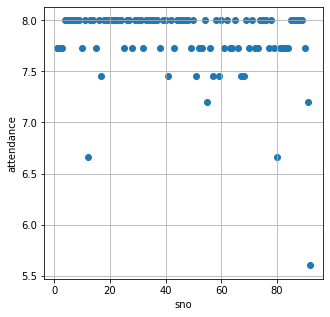

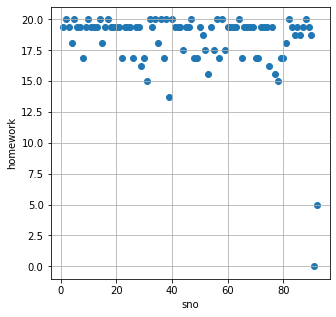

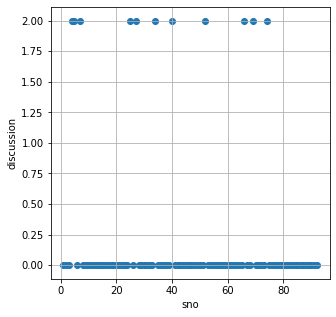

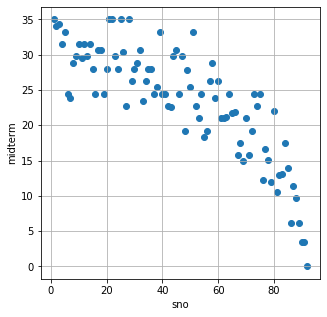

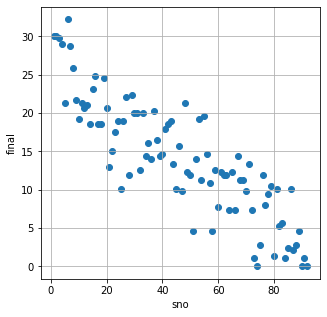

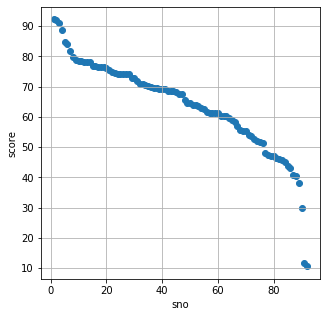

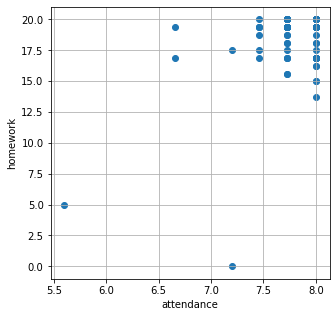

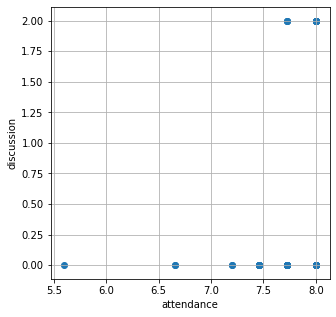

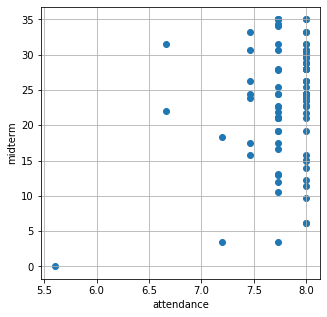

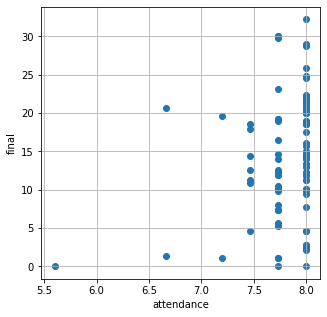

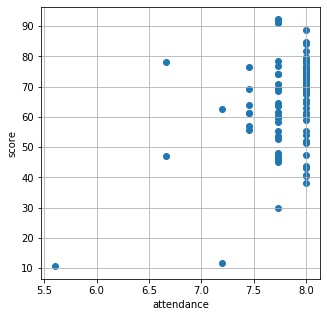

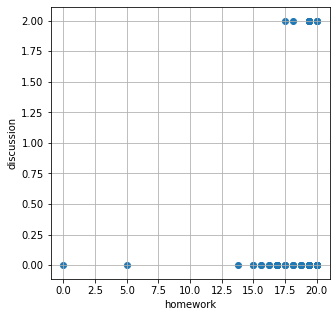

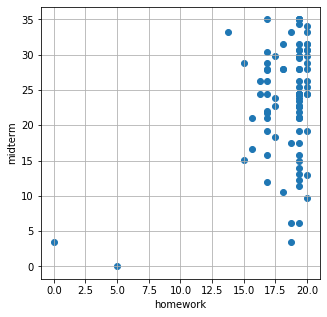

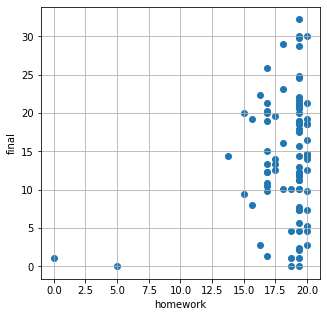

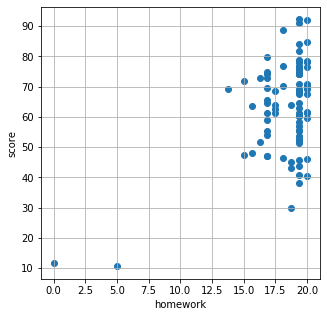

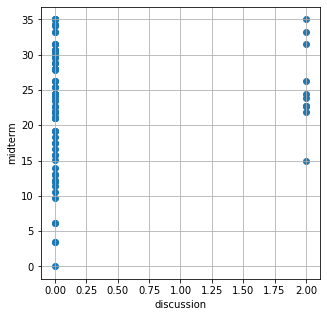

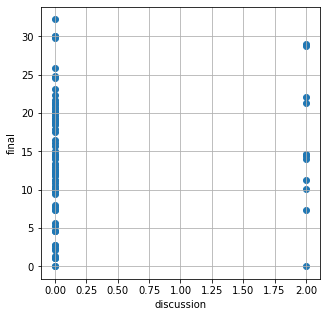

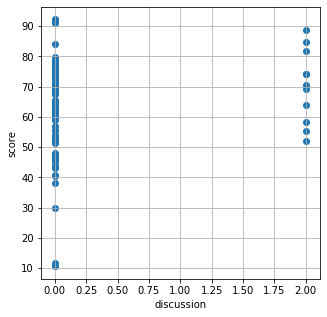

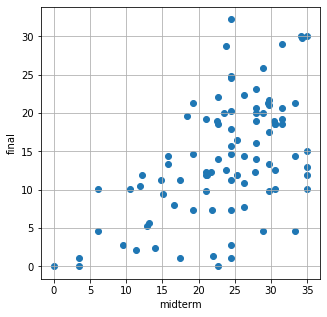

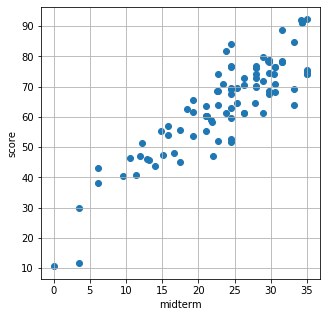

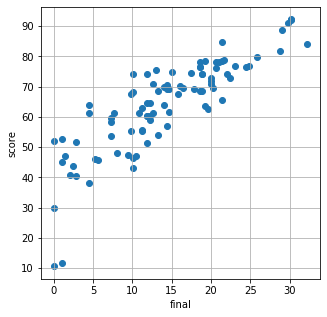

Scatter End


In [7]:
import pandas as pd
import matplotlib.pyplot as plt


f = 'C:/Users/82103/Desktop/Python/2020-2/db_score.xlsx'

df0 = pd.read_excel(f) 
df = pd.DataFrame(df0)

columns = [df.sno ,df.attendance, df.homework, df.discussion, df.midterm, df.final, df.score] 
label = df.columns                                      # x, y 축 이름 선언 위해서 선언


def scatter(x, y):                                     #
    for i in range(0,6):
        x = columns[i]
        x_l = label[i]
    
        for j in range(i+1, 7):
            y = columns[j] 
            y_l = label[j]
            
            plt.figure(figsize=(5, 5))                 # 플롯 사이즈 지정
            plt.scatter(x, y )                           # 산점도 (x축, y축)
            plt.xlabel(x_l)                              # x축 레이블 지정
            plt.ylabel(y_l)                              # y축 레이블 지정
            plt.grid(True)                               # 플롯에 격자 보이기
            plt.show()                                   # 플롯 보이기

    return print('Scatter End')

scatter(columns, label)